In [1]:
import numpy as np
from scipy.stats import spearmanr, binned_statistic

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    print("not found")
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
import joblib



from tqdm import tqdm, trange

from os.path import join
%load_ext autoreload
%autoreload 2

not found


In [2]:
cat0 = csiborgtools.read.HaloCatalogue(7468)
catxs = [csiborgtools.read.HaloCatalogue(nsim) for nsim in (7588, 8020, 8452, 8836)]
reader = csiborgtools.read.NPairsOverlap(cat0, catxs, max_dist=150 / 0.705)

In [3]:
xs = reader.summed_overlap()

<IPython.core.display.Javascript object>


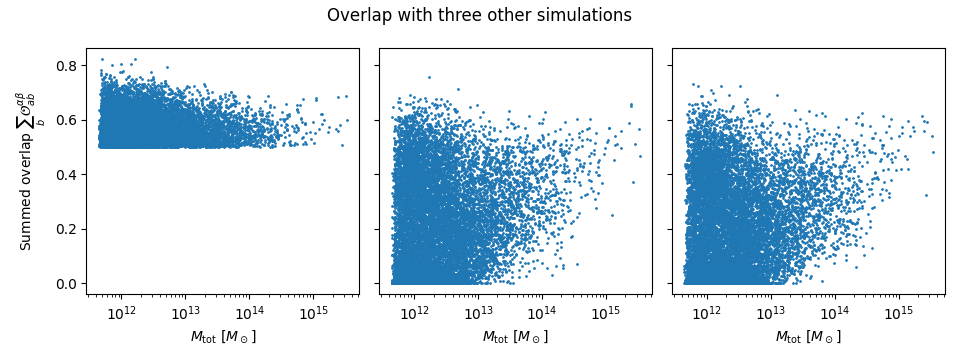

In [4]:
ks = xs[:, 0] > 0.5

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=[1.5 * 6.4, 4.8 * 0.75])
fig.subplots_adjust(wspace=0)
fig.suptitle("Overlap with three other simulations")
for i in range(3):
    axs[i].scatter(reader.cat0("totpartmass", ks), xs[ks, i], s=1)

    axs[i].set_xscale("log")
    axs[i].set_xlabel(r"$M_{\rm tot} ~ [M_\odot]$")

axs[0].set_ylabel(r"Summed overlap $\sum_{b} \mathcal{O}^{\alpha \beta}_{a b}$")
plt.tight_layout()

plt.savefig("../plots/summed_overlap.png", dpi=300)
fig.show()

<IPython.core.display.Javascript object>


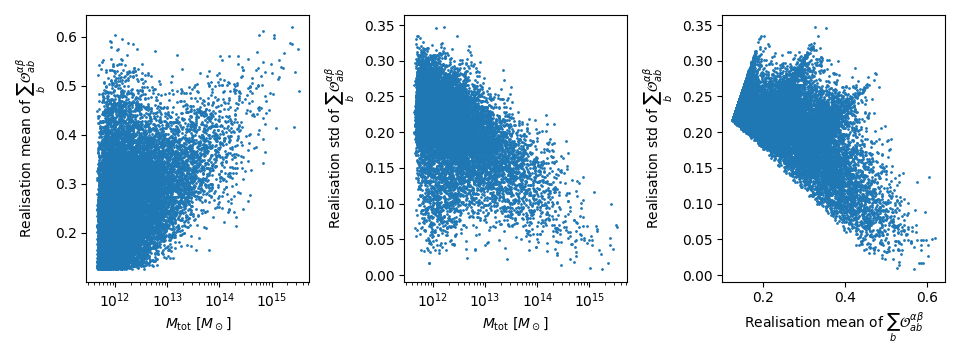

In [6]:
ks = xs[:, 0] > 0.5

fig, axs = plt.subplots(ncols=3, figsize=[1.5 * 6.4, 4.8 * 0.75])

axs[0].scatter(reader.cat0("totpartmass", ks), np.mean(xs[ks, :], axis=1), s=1)
axs[1].scatter(reader.cat0("totpartmass", ks), np.std(xs[ks, :], axis=1), s=1)
axs[2].scatter(np.mean(xs[ks, :], axis=1), np.std(xs[ks, :], axis=1), s=1)

for i in range(2):
    axs[i].set_xscale("log")
    axs[i].set_xlabel(r"$M_{\rm tot} ~ [M_\odot]$")

axs[0].set_ylabel(r"Realisation mean of $\sum_{b} \mathcal{O}^{\alpha \beta}_{a b}$")
axs[1].set_ylabel(r"Realisation std of $\sum_{b} \mathcal{O}^{\alpha \beta}_{a b}$")

axs[2].set_xlabel(r"Realisation mean of $\sum_{b} \mathcal{O}^{\alpha \beta}_{a b}$")
axs[2].set_ylabel(r"Realisation std of $\sum_{b} \mathcal{O}^{\alpha \beta}_{a b}$")
 
plt.tight_layout()
plt.savefig("../plots/averaged_summed_overlap.png", dpi=300)
fig.show()

In [36]:
mu, std, mu_full, std_full, mu2, std2 = reader.counterpart_mass(overlap_threshold=0.01, return_full=True)
probmatch = 1 - reader.prob_nomatch()

<IPython.core.display.Javascript object>


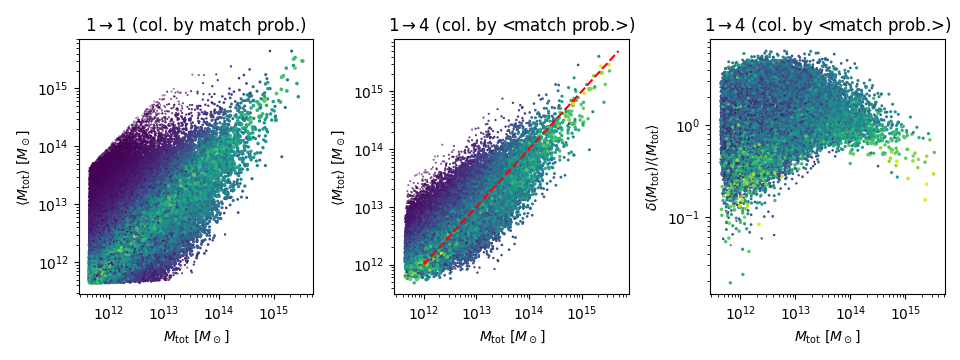

In [9]:
t = np.linspace(1e12, 5e15)

fig, axs = plt.subplots(ncols=3, figsize=[1.5 * 6.4, 4.8 * 0.75])
axs[0].scatter(reader.cat0("totpartmass"), mu_full[:, 0], c=probmatch[:, 0], s=5 * probmatch[:, 0],
            rasterized=True)


axs[1].scatter(reader.cat0("totpartmass"), mu, s=5 * np.mean(probmatch, axis=1), c=3 * np.mean(probmatch, axis=1))
axs[1].plot(t, t, c="red", ls="--")

axs[2].scatter(reader.cat0("totpartmass"), std / mu, s=5 * np.mean(probmatch, axis=1), c=3 * np.mean(probmatch, axis=1))

for i in range(3):
    axs[i].set_xlabel(r"$M_{\rm tot} ~ [M_\odot]$")
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")

axs[0].set_ylabel(r"$\langle M_{\rm tot} \rangle ~ [M_\odot]$")
axs[0].set_title(r"$1 \rightarrow 1$ (col. by match prob.)")

axs[1].set_ylabel(r"$\langle M_{\rm tot} \rangle ~ [M_\odot]$")
axs[1].set_title(r"$1\rightarrow 4$ (col. by <match prob.>)")


axs[2].set_ylabel(r"$\delta(M_{\rm tot}) / \langle M_{\rm tot} \rangle$")
axs[2].set_title(r"$1\rightarrow 4$ (col. by <match prob.>)")

fig.tight_layout()
fig.savefig("../plots/exp_mass.png", dpi=300)
fig.show()